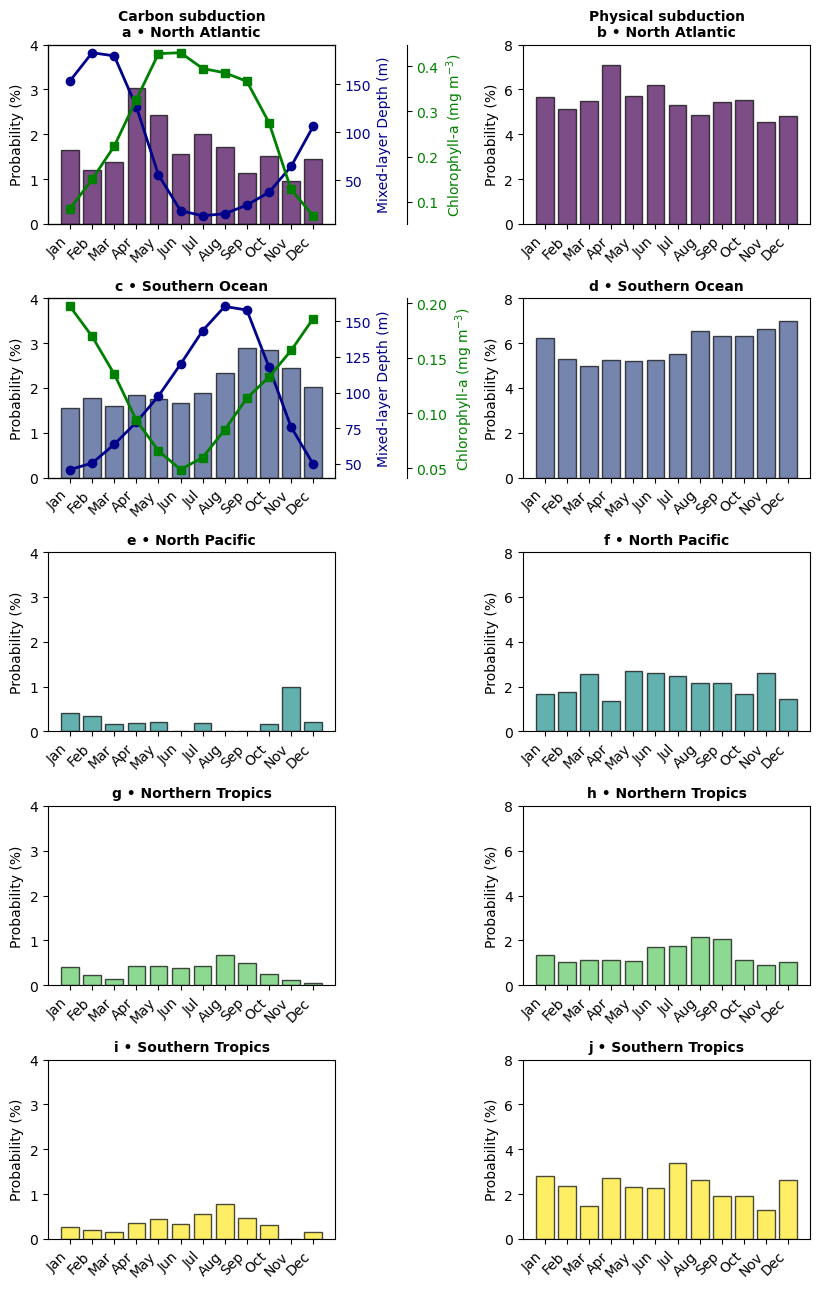

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

# 1) Load & prep (unchanged) …
df = pd.read_csv("data/histogram_data_full_for_python.csv")
df['MONTH'] = pd.to_numeric(df['MONTH'], errors='coerce')
df['carbon'] = df['carbon'].replace({
    "Subduction with/without carbon": "Physical subduction",
    "Subduction with carbon":         "Carbon subduction"
})
df = df.dropna(subset=['region','carbon','MONTH','proportion']).sort_values('MONTH')

desired_order = [
    "North Atlantic","Southern Ocean","North Pacific",
    "Northern Tropics","Southern Tropics"
]
regions      = [r for r in desired_order if r in df['region'].unique()]
carbon_types = sorted(df['carbon'].unique())

# 2) Colors & labels (unchanged) …
cmap = plt.get_cmap('viridis', len(regions))
region_colors = {reg: cmap(i) for i, reg in enumerate(regions)}
month_labels  = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# 3) Subplots (unchanged)
fig, axes = plt.subplots(
    nrows=len(regions), ncols=len(carbon_types),
    figsize=(8.3, 13.0), squeeze=False
)
plt.subplots_adjust(hspace=0.45, wspace=0.4)

alphabet = string.ascii_lowercase

for i, reg in enumerate(regions):
    for j, ctype in enumerate(carbon_types):
        ax   = axes[i, j]
        data = df[(df['region'] == reg) & (df['carbon'] == ctype)]

        # Bars (converted from proportion to percent)
        ax.bar(
            data['MONTH'], data['proportion'] * 100,
            color=region_colors[reg], edgecolor='black', alpha=0.7
        )

        # Panel letter
        letter = alphabet[i * len(carbon_types) + j]
        prefix = f"{letter} \u2022 "

        # Title logic
        if i == 0:
            title_txt = f"{ctype}\n" + prefix + f"{reg}"
        else:
            title_txt = prefix + reg
        ax.set_title(title_txt, fontsize=10, fontweight='bold', pad=6)

        # Axes cosmetics
        ax.set_xlabel("")
        ax.set_ylabel("Probability (%)", fontsize=10)
        ax.set_xticks(range(1, 13))
        ax.set_xticklabels(
            ["Jan","Feb","Mar","Apr","May","Jun",
             "Jul","Aug","Sep","Oct","Nov","Dec"],
            rotation=45, ha='right'
        )
        ax.set_ylim((0, 4) if ctype == "Carbon subduction" else (0, 8))

        # Optional twin axes (unchanged)
        if reg in ["North Atlantic", "Southern Ocean"] and ctype == "Carbon subduction":
            ax2 = ax.twinx()
            ax2.plot(data['MONTH'], data['MLD'],
                     color='darkblue', linewidth=2, marker='o')
            ax2.set_ylabel("Mixed-layer Depth (m)",
                           color='darkblue', fontsize=10)
            ax2.tick_params(axis='y', labelcolor='darkblue')

            ax3 = ax.twinx()
            ax3.spines.right.set_position(("axes", 1.25))
            ax3.plot(data['MONTH'], data['CHLA_mean'],
                     color='green', linewidth=2, marker='s')
            ax3.set_ylabel("Chlorophyll-a (mg m$^{-3}$)",
                           color='green', fontsize=10)
            ax3.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.savefig("pubfig/figure2_faceted_with_panel_labels.png", dpi=300)
plt.show()

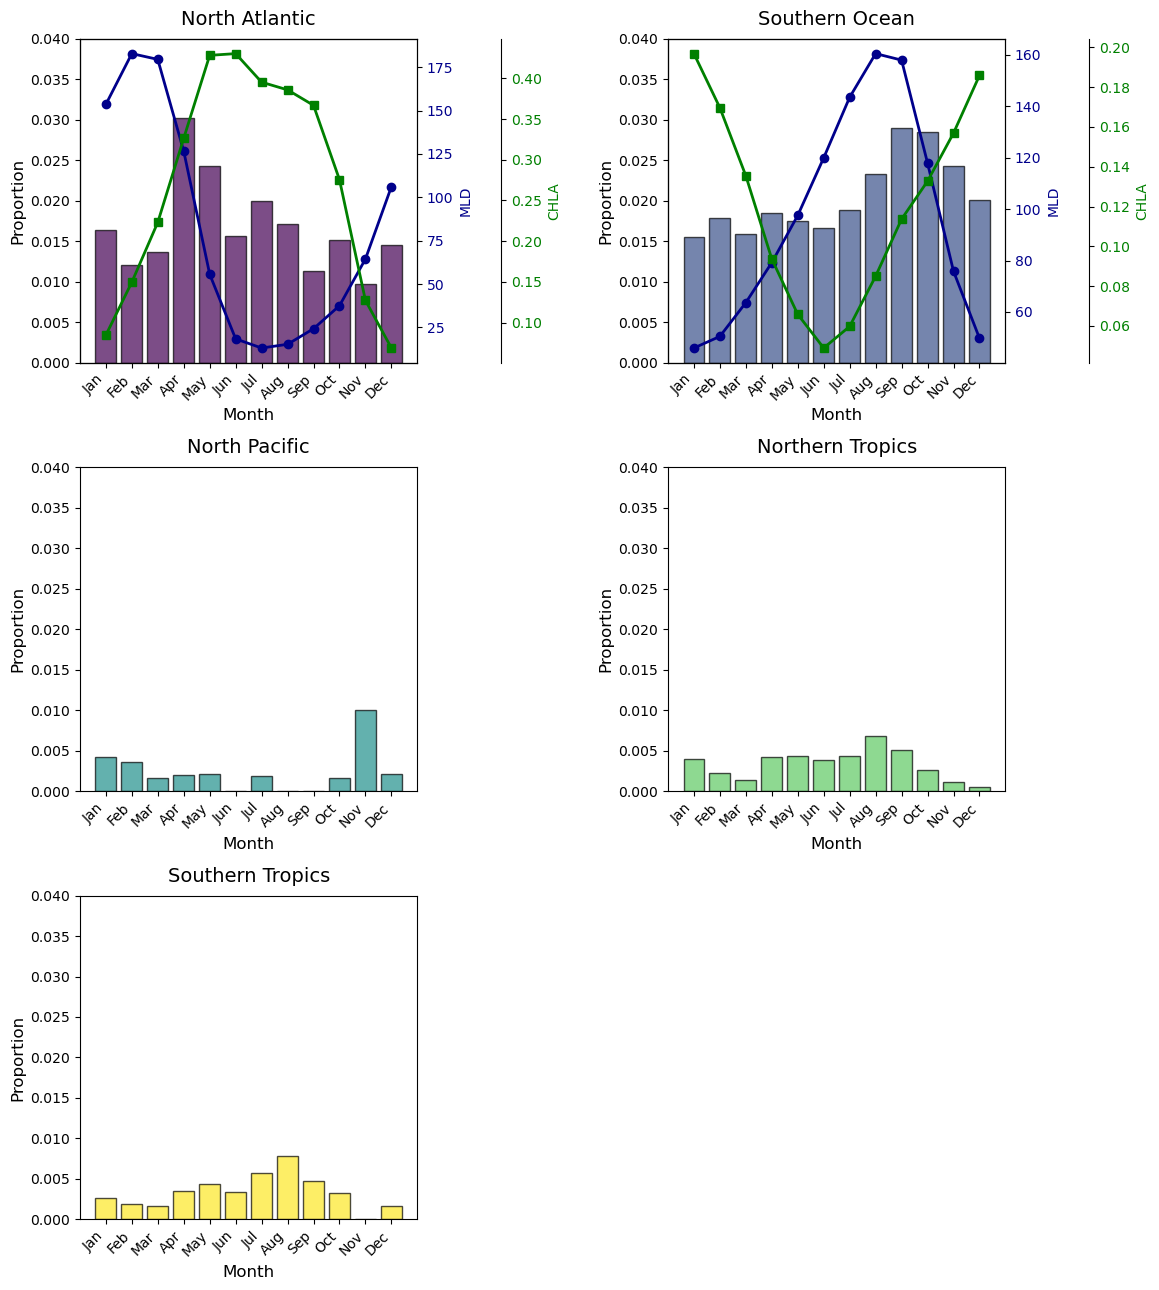

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# ──────────────────────────────────────────────────────────────────
# 1) Load, clean, and keep only carbon‑subduction rows  (unchanged)
# ──────────────────────────────────────────────────────────────────
df = (pd.read_csv("data/histogram_data_full_for_python.csv")
        .assign(carbon=lambda d: d['carbon'].replace({
            "Subduction with/without carbon": "Physical subduction",
            "Subduction with carbon":         "Carbon subduction"
        }),
        MONTH=lambda d: pd.to_numeric(d['MONTH'], errors='coerce'))
        .dropna(subset=['region', 'carbon', 'MONTH', 'proportion'])
        .sort_values('MONTH'))

desired_order = ["North Atlantic", "Southern Ocean",
                 "North Pacific", "Northern Tropics", "Southern Tropics"]
regions = [r for r in desired_order if r in df['region'].unique()]
df_cs   = df.query("carbon == 'Carbon subduction'")

# ──────────────────────────────────────────────────────────────────
# 2) Styling helpers (unchanged)
# ──────────────────────────────────────────────────────────────────
cmap  = plt.get_cmap("viridis", len(regions))
colors = {reg: cmap(i) for i, reg in enumerate(regions)}
months = ["Jan","Feb","Mar","Apr","May","Jun",
          "Jul","Aug","Sep","Oct","Nov","Dec"]

# ──────────────────────────────────────────────────────────────────
# 3) Figure: 3 rows × 2 cols  (six panels: five filled, one blank)
# ──────────────────────────────────────────────────────────────────
fig, axes = plt.subplots(nrows=3, ncols=2,
                         figsize=(12, 13),        # double the width
                         squeeze=False)
plt.subplots_adjust(hspace=0.6)

axes_flat = axes.flatten()   # easier one‑dimensional indexing

for idx, reg in enumerate(regions):         # idx = 0…4
    ax  = axes_flat[idx]                    # pick the right panel
    sub = df_cs[df_cs['region'] == reg]

    ax.bar(sub['MONTH'], sub['proportion'],
           color=colors[reg], edgecolor='black', alpha=0.7)

    ax.set_title(reg, fontsize=14, pad=10)
    ax.set_xlabel("Month", fontsize=12)
    ax.set_ylabel("Proportion", fontsize=12)

    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(months, rotation=45, ha="right")
    ax.set_ylim(0, 0.04)

    if reg in ["North Atlantic", "Southern Ocean"]:
        ax2 = ax.twinx()
        ax2.plot(sub['MONTH'], sub['MLD'],
                 color='darkblue', linewidth=2, marker='o')
        ax2.set_ylabel("MLD", fontsize=10, color='darkblue')
        ax2.tick_params(axis='y', labelcolor='darkblue')

        ax3 = ax.twinx()
        ax3.spines.right.set_position(("axes", 1.25))
        ax3.plot(sub['MONTH'], sub['CHLA_mean'],
                 color='green', linewidth=2, marker='s')
        ax3.set_ylabel("CHLA", fontsize=10, color='green')
        ax3.tick_params(axis='y', labelcolor='green')

# Hide the unused sixth subplot (index 5)
axes_flat[len(regions)].axis("off")

# ──────────────────────────────────────────────────────────────────
# 4) Save & show
# ──────────────────────────────────────────────────────────────────
plt.tight_layout()
plt.savefig("pubfig/figure2_carbon_subduction_only.png", dpi=300)
plt.show()

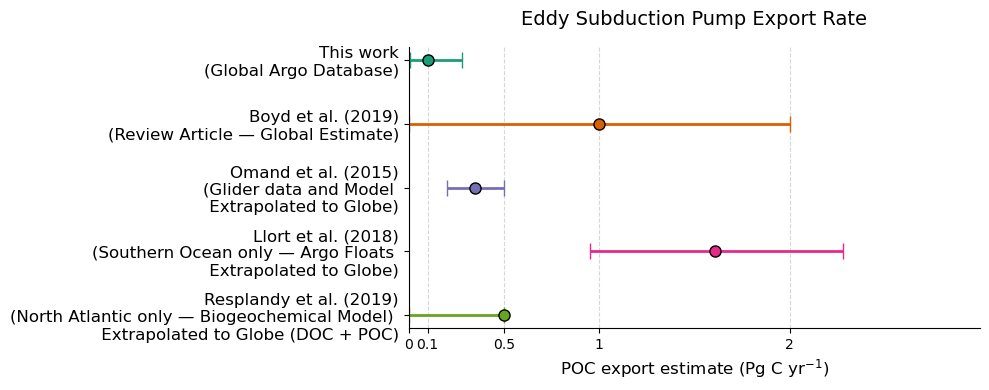

Saved updated plots with Boyd et al. (2019)


In [42]:
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Ensure output directory exists
os.makedirs("figures", exist_ok=True)

# New color palette (ColorBrewer Dark2, color‐blind friendly)
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']

# Data for literature estimates (some with error bars)
papers = [
        {"label": "Boyd et al. (2019)\n(Review Article — Global Estimate)", "value": 1.0, "err": 
     (1.0 - 0.0, 2.0 - 1.0)},
    {"label": "Omand et al. (2015)\n(Glider data and Model \n Extrapolated to Globe)", "value": 0.35, "err": 
     (0.5 - 0.35, 0.35 - 0.20)},
    {"label": "Llort et al. (2018)\n(Southern Ocean only — Argo Floats \n Extrapolated to Globe)", "value": 1.61,"err": 
     (1.61 - 0.95, 2.28 - 1.61)},
        {"label": "Resplandy et al. (2019)\n(North Atlantic only — Biogeochemical Model) \n Extrapolated to Globe (DOC + POC)", 
     "value": 0.50,"err":(0.50-0.0,0-0)}
]

# User's global-Argo estimate2,7×19÷100
my_estimate = {
    "label": "This work\n(Global Argo Database)",
    "value": 0.10,
    "err": (0.10 - 0.005, 0.28 - 0.10),
}

# Tick values for log axis
ticks = [0,0.1, 0.5, 1, 2]

# Common plotting function
def plot_esp(papers_data, include_estimate=False, filename="fig.png"):
    fig, ax = plt.subplots(figsize=(10, 4))
    data = ([my_estimate] if include_estimate else []) + papers_data 
    for i, p in enumerate(data):
        if "err" in p:
            err_low, err_high = p["err"]
            ax.errorbar(
                p["value"], i,
                xerr=[[err_low], [err_high]],
                fmt='o', color=colors[i % len(colors)], ecolor=colors[i % len(colors)],
                elinewidth=2, capsize=6, markeredgecolor='k', markersize=8
            )
        else:
            ax.scatter(p["value"], i, color=colors[i % len(colors)], s=100, edgecolor='k')
    
    ax.set_yticks(range(len(data)))
    ax.set_yticklabels([p["label"] for p in data], fontsize=10)
    ax.set_xlabel("POC export estimate (Pg C yr$^{-1}$)", fontsize=10)
    title = "Eddy Subduction Pump Export Rate"
    ax.set_title(title, fontsize=12, pad=16)
    
    ax.grid(axis='x', linestyle='--', alpha=0.5)
    ax.set_xticks(ticks)
    ax.get_xaxis().set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:g}"))
    ax.set_xlim(0, 3)
    ax.invert_yaxis()
    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)
    
    plt.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show(fig)

# Generate and save plots
plot_esp(papers, include_estimate=True, filename="figures/ESP_estimates_lit_with_globargo.png")

print("Saved updated plots with Boyd et al. (2019)")
